In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [2]:
# read the csv file as a pandas dataframe

index = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

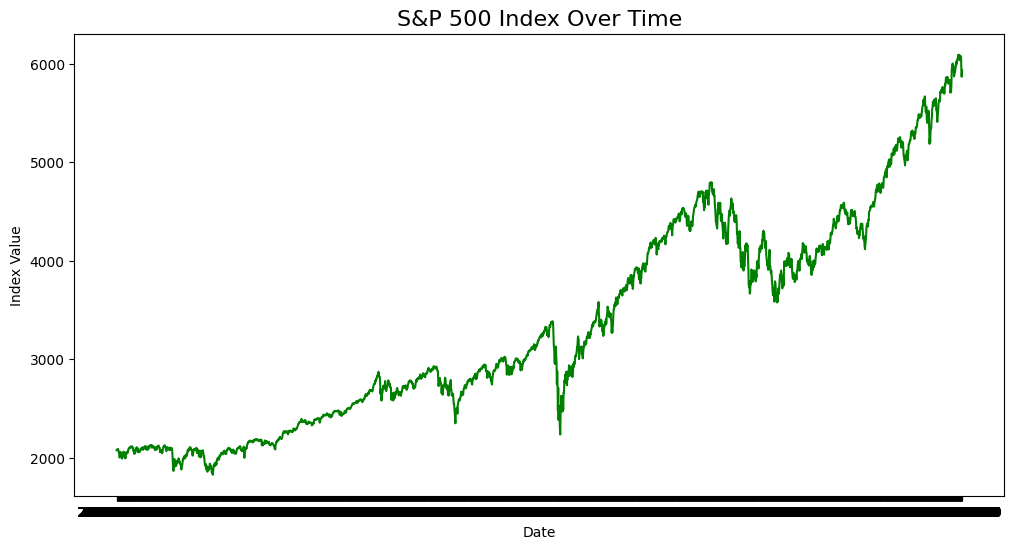

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(index['Date'], index['S&P500'], color='green')
plt.title('S&P 500 Index Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

In [4]:
index['S&P500_return'] = index['S&P500'].pct_change() * 100  # Multiply by 100 to express as a percentage

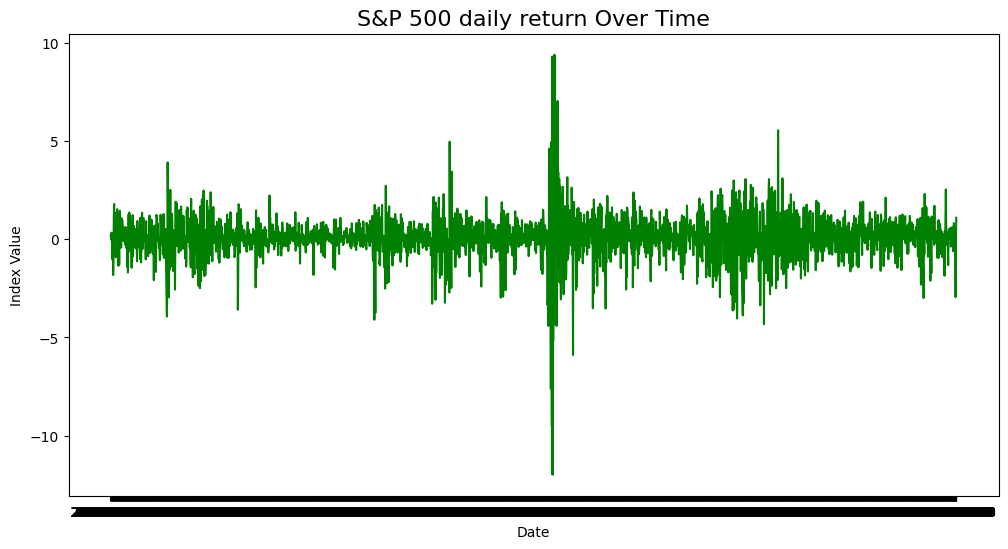

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(index['Date'], index['S&P500_return'], color='green')
plt.title('S&P 500 daily return Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

In [6]:
mean_return = index['S&P500_return'].mean()
std_return = index['S&P500_return'].std()
median_return = index['S&P500_return'].median()

print(f'average daily return of S&P500 is {mean_return}')
print(f'standard deviation daily return of S&P500 is {std_return}')
print(f'median daily return of S&P500 is {median_return}')

average daily return of S&P500 is 0.048005863992082023
standard deviation daily return of S&P500 is 1.122275945748199
median daily return of S&P500 is 0.06393824414754334


In [7]:
from scipy.stats import ttest_1samp
# I want to determine whether the S&P500 daily return is different to 0
# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(index['S&P500_return'].dropna(), 0)

# Display results
print(f"Mean Return: {mean_return}")
print(f"Standard Deviation: {std_return}")
print(f"Median Return: {median_return}")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The S&P500_return is significantly different from 0 (reject null hypothesis).")
else:
    print("The S&P500_return is not significantly different from 0 (fail to reject null hypothesis).")


Mean Return: 0.048005863992082023
Standard Deviation: 1.122275945748199
Median Return: 0.06393824414754334
T-Statistic: 2.145605897225314
P-Value: 0.031999900483665966
The S&P500_return is significantly different from 0 (reject null hypothesis).


In [8]:
index.head()

,Date,S&P500,S&P500_return
0,2014-12-22,2078.54,NaN
1,2014-12-23,2082.17,0.174642
2,2014-12-24,2081.88,-0.013928
3,2014-12-26,2088.77,0.330951
4,2014-12-29,2090.57,0.086175


In [9]:
index.shape

(2517, 3)

In [10]:
index.dtypes

Date              object
S&P500           float64
S&P500_return    float64
dtype: object

In [11]:
index.columns

Index(['Date', 'S&P500', 'S&P500_return'], dtype='object')

In [12]:
index['S&P500'].unique()

array([2078.54, 2082.17, 2081.88, ..., 5872.16, 5867.08, 5930.85])